In [13]:
from google.colab import files
 
 
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset (1).csv


In [14]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [16]:
Review=df['review']
Sentiment=df['sentiment']

In [44]:
Sentiment = Sentiment.apply(lambda x: 1 if x == 'positive' else 0)

In [45]:
tfidf = TfidfVectorizer()
tfidf.fit(df['review'])
text_vector = tfidf.transform(df['review'])
#print(text_vector)

##Splitting data

R_train_data, R_test_data, S_train_data, S_test_data= train_test_split(Review, Sentiment, test_size=0.2, random_state=1000)

In [46]:
print("Review Training data: ",(R_train_data.shape))
print("Review Test data: ",(R_test_data.shape))
print("Sentiment Training data: ",(S_train_data.shape))
print("Sentiment Training data: ",(S_test_data.shape))

Review Training data:  (40000,)
Review Test data:  (10000,)
Sentiment Training data:  (40000,)
Sentiment Training data:  (10000,)


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(R_train_data)
X_train = vectorizer.transform(R_train_data)
X_test  = vectorizer.transform(R_test_data)
X_train

<40000x93033 sparse matrix of type '<class 'numpy.int64'>'
	with 5458173 stored elements in Compressed Sparse Row format>

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
classifier1 = LogisticRegression()
classifier1.fit(X_train, S_train_data)
score1 = classifier1.score(X_test, S_test_data)
print('Accuracy of Logistic Regression model: ', score1)

Accuracy of Logistic Regression model:  0.8883


In [64]:
predicted_y1 = classifier1.predict(X_test)
predicted_y1 = predicted_y1.flatten()
print(classification_report(S_test_data, predicted_y1))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5054
           1       0.88      0.89      0.89      4946

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [50]:
classifier2 = MultinomialNB()
classifier2.fit(X_train, S_train_data)
score2 = classifier2.score(X_test, S_test_data)
print('Accuracy of Naive-Bayes model: ', score2)

Accuracy of Naive-Bayes model:  0.8415


In [66]:
predicted_y2 = classifier2.predict(X_test)
predicted_y2 = predicted_y2.flatten()
print(classification_report(S_test_data, predicted_y2))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      5054
           1       0.86      0.81      0.83      4946

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



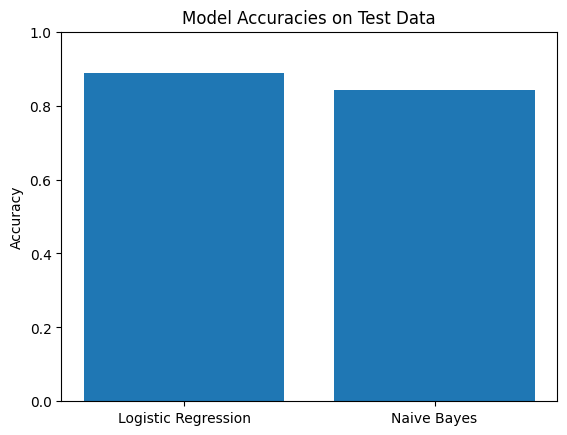

In [51]:
import matplotlib.pyplot as plt
plt.bar(['Logistic Regression', 'Naive Bayes'], [score1, score2])
plt.title('Model Accuracies on Test Data')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


## **Deep Learning**

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [53]:
MAX_WORDS = 10000


tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(R_train_data)

X_train_seq = tokenizer.texts_to_sequences(R_train_data)
X_test_seq = tokenizer.texts_to_sequences(R_test_data)

MAX_SEQ_LENGTH = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_SEQ_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=MAX_SEQ_LENGTH, padding='post', truncating='post')

In [54]:
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=64, input_length=MAX_SEQ_LENGTH))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           640000    
                                                                 
 lstm_6 (LSTM)               (None, 100, 64)           33024     
                                                                 
 dropout_3 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 685,473
Trainable params: 685,473
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(X_train_padded, S_train_data, epochs=25, batch_size=32, validation_data=(X_test_padded, S_test_data))

Epoch 1/25
1250/1250 [==============================] - 156s 122ms/step - loss: 0.4601 - accuracy: 0.7853 - val_loss: 0.3903 - val_accuracy: 0.8314
Epoch 2/25
1250/1250 [==============================] - 175s 140ms/step - loss: 0.3267 - accuracy: 0.8652 - val_loss: 0.3671 - val_accuracy: 0.8435
Epoch 3/25
1250/1250 [==============================] - 165s 132ms/step - loss: 0.2645 - accuracy: 0.8942 - val_loss: 0.3851 - val_accuracy: 0.8380
Epoch 4/25
1250/1250 [==============================] - 167s 134ms/step - loss: 0.2113 - accuracy: 0.9180 - val_loss: 0.4156 - val_accuracy: 0.8379
Epoch 5/25
1250/1250 [==============================] - 174s 139ms/step - loss: 0.1648 - accuracy: 0.9392 - val_loss: 0.4619 - val_accuracy: 0.8340
Epoch 6/25
1250/1250 [==============================] - 174s 139ms/step - loss: 0.1288 - accuracy: 0.9550 - val_loss: 0.5120 - val_accuracy: 0.8287
Epoch 7/25
1250/1250 [==============================] - 175s 140ms/step - loss: 0.1064 - accuracy: 0.9648 - val_

In [57]:
loss, accuracy = model.evaluate(X_test_padded, S_test_data)
print('Accuracy of Neural Network Model:', accuracy)

313/313 [==============================] - 11s 35ms/step - loss: 1.0712 - accuracy: 0.8193
Accuracy of Neural Network Model: 0.8192999958992004


In [70]:
y_pred = model.predict(X_test_padded)
y_pred = [1 if x > 0.5 else 0 for x in y_pred]
f1 = f1_score(S_test_data, y_pred)
print("F1 score:", f1)

313/313 [==============================] - 11s 35ms/step
F1 score: 0.818665328650276
